# Exploration

Attempt 1

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import utilities

sns.set_style('white')

In [39]:
# Read csv
df = pd.read_pickle('strava_data.p')
df.head()

,id,athlete_count,distance,avg_speed,moving_time,avg_hr,type,elevation_gain,latlng
date,,,,,,,,,
2017-07-09 17:52:52,1179739272,1,0.0,0.000,01:45:02,119.1,Ride,0.0,None
2017-07-07 18:00:38,1176094669,1,5022.2,2.589,00:32:20,NaN,Run,21.9,"(55.95, -3.19)"
2017-07-06 18:10:57,1174619866,1,0.0,0.000,00:42:11,105.4,Ride,0.0,None
2017-07-05 17:50:32,1173071844,1,4977.9,2.469,00:33:36,148.3,Run,20.5,"(55.95, -3.19)"
2017-07-01 16:30:48,1173071487,1,2889.1,2.586,00:18:37,160.1,Run,20.4,"(55.95, -3.19)"


### Seperate Ride and Run data

In [3]:
df_run = df[df['type'] == 'Run']
df_ride = df[df['type'] == 'Ride']

In [4]:
print('Total Running Distance: {:.2f} km'.format(df_run.distance.sum()/1000))
print('Total Running Time: {} '.format(df_run.moving_time.sum()))

Total Running Distance: 928.77 km
Total Running Time: 4 days 00:46:38 


In [5]:
print('Total Cycling Time: {}'.format(df_ride.moving_time.sum()))

Total Cycling Time: 2 days 15:05:54


#### New column - Pace (df_run)

In [6]:
df_run['pace'] = df_run['avg_speed'].apply(utilities.speed_to_pace)
df_run.head()

C:\Users\brian1123\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,id,athlete_count,distance,avg_speed,moving_time,avg_hr,type,elevation_gain,latlng,pace
date,,,,,,,,,,
2017-07-07 18:00:38,1176094669,1,5022.2,2.589,00:32:20,NaN,Run,21.9,"(55.95, -3.19)",6.437492
2017-07-05 17:50:32,1173071844,1,4977.9,2.469,00:33:36,148.3,Run,20.5,"(55.95, -3.19)",6.750371
2017-07-01 16:30:48,1173071487,1,2889.1,2.586,00:18:37,160.1,Run,20.4,"(55.95, -3.19)",6.444960
2017-06-28 19:55:15,1163118846,1,414.8,2.942,00:02:21,NaN,Run,0.0,"(55.95, -3.19)",5.665080
2017-06-28 19:30:59,1163118747,1,2732.6,2.598,00:17:32,NaN,Run,75.0,"(55.96, -3.16)",6.415191


In [38]:
# df_run.avg_hr.isnull().sum()
prop_hr_null = df_run.avg_hr.count()/len(df_run.avg_hr)
print('Proportion of Null HR: {:.2f}'.format(prop_hr_null))

Proportion of Null HR: 0.35


#### Drop outlier to for training data

In [7]:
# percentiles
low = 0.05
high = 0.95
quant_df_run = df_run.quantile([low, high])
print(quant_df_run)

      athlete_count   distance  avg_speed  avg_hr  elevation_gain      pace
0.05            1.0   1960.730    2.27575  141.68           0.000  5.405860
0.95            2.0  14106.145    3.08310  171.74         170.845  7.326132


In [9]:
# filter quantiles (pace)

def outlier_pace(x):
    cond_low = x > quant_df_run['pace'].loc[low]
    cond_high = x < quant_df_run['pace'].loc[high]
    output = cond_low and cond_high
    return not output

# filter quantiles (avg_hr)

def outlier_avg_hr(x):
    cond_low = x > quant_df_run['avg_hr'].loc[low]
    cond_high = x < quant_df_run['avg_hr'].loc[high]
    output = cond_low and cond_high
    return not output
    
# five_to_ninety_five(5)

In [10]:
df_run['outlier_pace'] = df_run['pace'].apply(outlier_pace)
df_run['outlier_avg_hr'] = df_run['avg_hr'].apply(outlier_avg_hr)

C:\Users\brian1123\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\brian1123\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,id,athlete_count,distance,avg_speed,moving_time,avg_hr,type,elevation_gain,latlng,pace,outlier_pace,outlier_avg_hr
date,,,,,,,,,,,,
2017-07-07 18:00:38,1176094669,1,5022.2,2.589,00:32:20,NaN,Run,21.9,"(55.95, -3.19)",6.437492,False,True
2017-07-05 17:50:32,1173071844,1,4977.9,2.469,00:33:36,148.3,Run,20.5,"(55.95, -3.19)",6.750371,False,False
2017-07-01 16:30:48,1173071487,1,2889.1,2.586,00:18:37,160.1,Run,20.4,"(55.95, -3.19)",6.444960,False,False
2017-06-28 19:55:15,1163118846,1,414.8,2.942,00:02:21,NaN,Run,0.0,"(55.95, -3.19)",5.665080,False,True
2017-06-28 19:30:59,1163118747,1,2732.6,2.598,00:17:32,NaN,Run,75.0,"(55.96, -3.16)",6.415191,False,True


In [11]:
# Filter outliers and remove mask

filt_df_run = df_run[
    (df_run['outlier_avg_hr'] == False) 
    & (df_run['outlier_pace'] == False)].drop(['outlier_avg_hr', 'outlier_pace'],axis=1)

In [36]:
prop_filt = len(filt_df_run) / len(df_run)
print('Proportion of data filtered: {:.2f}'.format(prop_filt))

Proportion of data filtered: 0.30


In [12]:
# Convert moving_time to minutes

def time_to_mins(x):
    return x.seconds/60

filt_df_run['duration'] = filt_df_run['moving_time'].apply(time_to_mins)
filt_df_run = filt_df_run.drop('moving_time', axis=1)

## Initial Plotting

In [19]:
plt_run = filt_df_run.dropna(subset=['avg_hr'])

In [20]:
plt_run.dtypes

id                 object
athlete_count       int64
distance          float64
avg_speed         float64
avg_hr            float64
type               object
elevation_gain    float64
latlng             object
pace              float64
duration          float64
dtype: object

In [21]:
# save only int and float for pairplot
plt_pairplot = plt_run.drop(['id', 'type', 'latlng', 'avg_speed', 'elevation_gain'], axis=1)

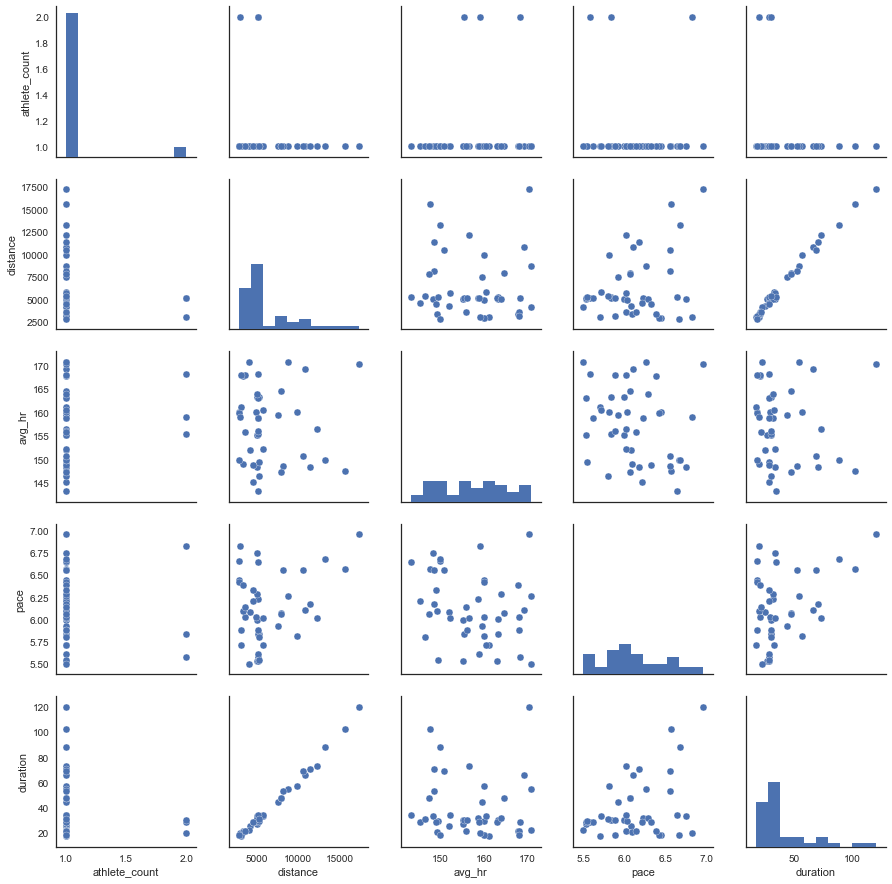

In [22]:
sns.pairplot(plt_pairplot)